In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
  -O /tmp/horse-or-human.zip

--2019-05-13 10:27:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   167MB/s    in 0.9s    

2019-05-13 10:27:35 (167 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')


In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse42-3.png', 'horse27-4.png', 'horse40-8.png', 'horse04-2.png', 'horse24-1.png', 'horse27-5.png', 'horse38-5.png', 'horse48-9.png', 'horse21-6.png', 'horse05-5.png']
['human01-20.png', 'human04-09.png', 'human16-14.png', 'human11-01.png', 'human10-05.png', 'human07-07.png', 'human11-08.png', 'human09-30.png', 'human09-05.png', 'human14-08.png']


In [6]:
print('print total images', len(os.listdir(train_horse_dir)))
print('print total images', len(os.listdir(train_human_dir)))

print total images 500
print total images 527


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

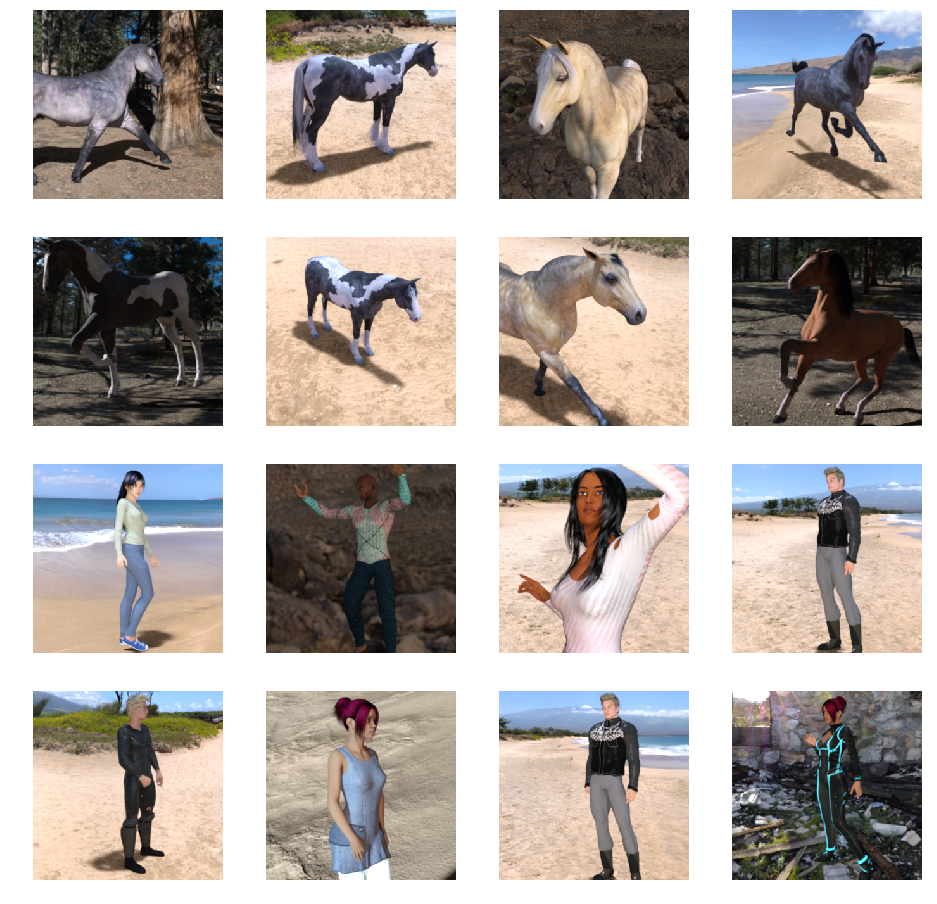

In [8]:
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[0:10]]

for i, img_path in enumerate(next_horse_pix):
  sp = plt.subplot(8, 8, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()



In [0]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1,activation='sigmoid')    
])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
__________

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescaling images by 1./255

train_datagen= ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
'/tmp/horse-or-human', #source direct
target_size=(300,300), # all images will be resized to 150X150 
batch_size=128,
class_mode='binary'  # Since we use binary_crossentropy loss, we need binary labels
)

Found 1027 images belonging to 2 classes.


In [14]:
history= model.fit_generator(train_generator, steps_per_epoch=8, epochs=15, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
9/9 [==============================] - 9s 986ms/step - loss: 0.7683 - acc: 0.5501
Epoch 2/15
9/9 [==============================] - 8s 872ms/step - loss: 0.6661 - acc: 0.6962
Epoch 3/15
9/9 [==============================] - 8s 904ms/step - loss: 0.5510 - acc: 0.7478
Epoch 4/15
9/9 [==============================] - 8s 905ms/step - loss: 0.3210 - acc: 0.8598
Epoch 5/15
9/9 [==============================] - 8s 908ms/step - loss: 0.1816 - acc: 0.9299
Epoch 6/15
9/9 [==============================] - 8s 919ms/step - loss: 0.2473 - acc: 0.9046
Epoch 7/15
9/9 [==============================] - 8s 922ms/step - loss: 0.0371 - acc: 0.9864
Epoch 8/15
9/9 [==============================] - 8s 926ms/step - loss: 0.3509 - acc: 0.9338
Epoch 9/15
9/9 [==============================] - 8s 943ms/step - loss: 0.0325 - acc: 0.9932
Epoch 10/15
9/9 [==============================] - 9s 945ms/step - loss: 0.2747 - acc: 0.9348
Epoch 11/15
9/9 [====

In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Using TensorFlow backend.


Saving 2.jpg to 2 (11).jpg
[0.]
2.jpg is a horse


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


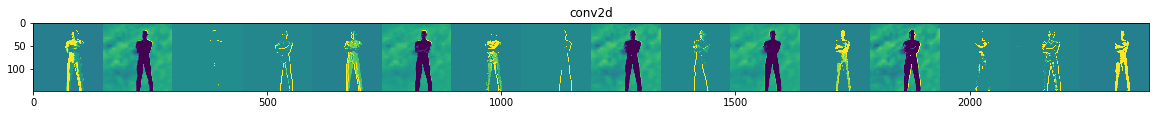

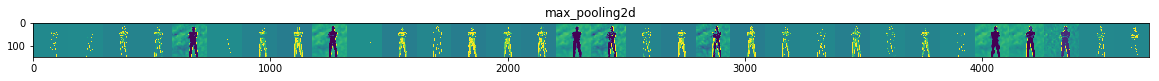

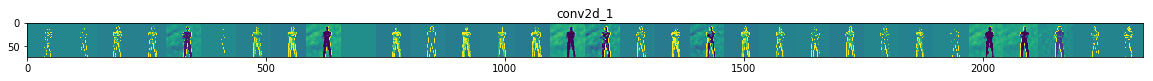

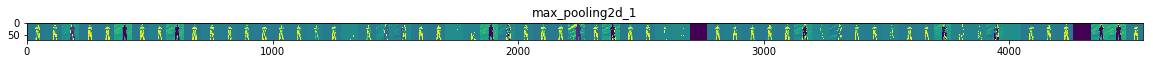

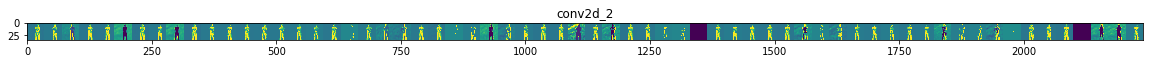

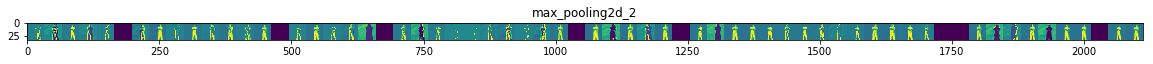

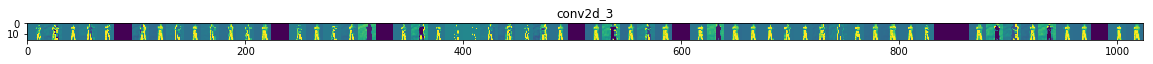

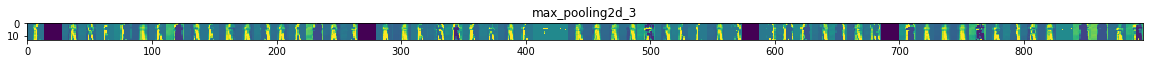

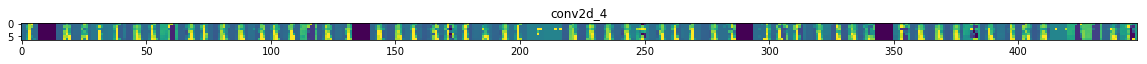

In [16]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')